In [1]:
# coding:utf-8
from bs4 import BeautifulSoup as bs 
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import pygal

page=[]

In [2]:
# 获取到网页，并用beautifulsoup来处理
def open_net(net_url):
	try:
		html=urlopen(net_url)
	except (HTTPError,URLError) as hu:
		print('出错啦！')
		return None
	else:
		return bs(html,'lxml')


In [3]:
# 获取数据
def get_top_datas(net_url):
	i=0
	scores=get_topMoive_star(net_url)
	bsObj=open_net(net_url)
	movie_item_infos=bsObj.findAll('div',{'class':'movie-item-info'})
	for movie_item_info in movie_item_infos:
		yield{
		'title':movie_item_info.p.a.get_text(),
		'href':'http://maoyan.com/'+movie_item_info.p.a.attrs['href'],
		'star':scores[i],
		'time':movie_item_info.find('p',{'class':'releasetime'}).get_text().replace('上映时间：','')
		}
		i+=1


In [4]:
# 获取评分数字
def get_topMoive_star(net_url):
	scores=[]
	bsObj=open_net(net_url)
	score_nums=bsObj.findAll('div',{'class':{'movie-item-number','score-num'}})
	for score_num in score_nums:
		scores.append(score_num.p.get_text())
	return scores


In [5]:
# 把数据写进文件中去
def create_top_txt(datas,i):
	global page
	with open('C://Users//ashley//Desktop//榜单//top'+str(i)+'.txt','w',encoding='utf-8')as f:
		for data in datas:
			f.write('名称：'+data['title']+',链接：'+data['href']+',评分：'+data['star']+',上映时间：'+str(data['time'])+'\n')
			page.append(data)
	print('文件'+str(i)+'写入成功！')

In [6]:
# 数据可视化
def create_plt(datas):
	d,s=[],[]
	#配置对象
	config=pygal.Config()
	#x轴标签旋转角度
	config.x_label_rotation=-45  
	#自定义图表宽度
	config.width=1500  
	line_chart=pygal.Line(config)
	line_chart.title='猫眼榜单Top100'
	for data in datas:
		d.append(data['title'])
		s.append(int(float(data['star'])*10)/10)
	line_chart.x_labels=d
	line_chart.add('评分',s)
	line_chart.render_to_file('猫眼榜单TOP100.svg')


In [7]:
def main():
	i=0
	while i<=90:
		net_url='http://maoyan.com/board/4?offset='+str(i);
		datas=get_top_datas(net_url)
		create_top_txt(datas,i)
		i+=10
	create_plt(page)

In [8]:
main()

文件0写入成功！
文件10写入成功！
文件20写入成功！
文件30写入成功！
文件40写入成功！
文件50写入成功！
文件60写入成功！
文件70写入成功！
文件80写入成功！
文件90写入成功！


UnicodeDecodeError: 'cp950' codec can't decode byte 0xe5 in position 0: illegal multibyte sequence

In [13]:
import urllib.request
import urllib.parse
import json
import os

qqqq=[0,0,0,0,0]               #初始化高德待分析评分医院数据
cityList = [
    ["110114","昌平"]
    ]
allList = []#设置成全局变量，方便下一段调用，医院
def url_open(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent','Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38.0.2125.122 Safari/537.36')
    response = urllib.request.urlopen(req)
    html = response.read().decode('utf-8','ignore')
    return html
#
def get_urlList():
    key = "50e65557c15b15a186100e815fa12662"
    engGS = urllib.parse.quote("电影院")
    urlList = []
    for city in cityList:
        #url = "http://restapi.amap.com/v3/place/text?key="+key+"&keywords="+engGS+"&types="+engGS+"&city="+city[0]+"&children=1&offset=20&page=1&extensions=all"
        #url = "http://restapi.amap.com/v3/place/text?key="+key+"&keywords="+engGS+"&types="+engGS+"&city="+city[0]+"&children=1&extensions=all"
        url = "http://restapi.amap.com/v3/place/text?key="+key+"&keywords="+engGS+"&types="+engGS+"&city="+city[0]+"&children=1&extensions=all"
        urlList.append(url)
    return urlList
 
def total_gasStation():
    urlList = get_urlList()
    i = 0
    totalNum = 0
    cityListNo = []
    for url in urlList:
        html = url_open(url)
        target = json.loads(html)
        gsNo = int(target['count'])
        pageNo = divmod(gsNo,20)[0]+1 if divmod(gsNo,20)[1]>0 else divmod(gsNo,20)[0]
        cityListNo.append([cityList[i][0],cityList[i][1],gsNo,pageNo])
        totalNum = totalNum + gsNo
        i = i + 1
    return cityListNo
 
def get_GSByCity():
    cityListNo = total_gasStation()
    key = "50e65557c15b15a186100e815fa12662"
    engGS = urllib.parse.quote("电影院")
    cityUrlList = []
    for city in cityListNo:   #1
        urlList = []
        for i in range(city[3]):
            #print(city)
            url = "http://restapi.amap.com/v3/place/text?key="+key+"&keywords="+engGS+"&types="+engGS+"&city="+city[0]+"&children=1&offset=20&page="+str(i+1)+"&extensions=all"
            urlList.append(url)
        cityUrlList.append(urlList)
    return cityUrlList
 
def get_gsList():
    cityUrlList = get_GSByCity()
    
    global allList#要声明此处列标为全局变量，否则报错
    for cityUrl in cityUrlList:
        cityPoisList = []
        for url in cityUrl:
            html = url_open(url)
            target = json.loads(html)
            pagePoisList = target['pois']
            cityPoisList.append(pagePoisList)
        cityPoisList = sum(cityPoisList,[])
        allList.append(cityPoisList)
    allList = sum(allList,[])
    ffff = []
    #i= 0
    for aList in allList:       
        try:
            #print(aList['id'])
            dddd = aList['id']+'\t'+aList['name']+'\t'+aList['pname']+'\t'+aList['cityname']+'\t'+aList['adname']+'\t'+aList['address']+'\t'+aList['type']+'\t'+aList['location']+'\n'
            
        except Exception as e:
            continue
        else:
            ffff.append(dddd)
        #i+=1
        #print(i)
        print(dddd)                                                      #可以找到每一条数据中对应的信息
        if aList['name']=="沙河医院":#1
            #analysis[0]=i
            qqqq[0]=aList
        elif aList['name']=="北京市昌平区中医医院":#8
            qqqq[1]=aList
        elif aList['name']=="昌平区医院":#0
            qqqq[2]=aList
        elif aList['name']=="北京市昌平区天通苑中医医院":#5
            qqqq[3]=aList
        elif aList['name']=="昌平博爱医院":#3
            qqqq[4]=aList
     
if __name__ == '__main__':
    get_gsList()
#print(qqqq)

B000A8UMG2	中影国际影城(北京昌平永旺店)	北京市	北京市	昌平区	北清路1号永旺国际商城购物中心3层	体育休闲服务;影剧院;电影院	116.288545,40.097514

B000A868OG	大地数字影院(菓岭假日店)	北京市	北京市	昌平区	昌崔路203号菓岭假日广场4层	体育休闲服务;影剧院;电影院	116.265166,40.222146

B000AAEZQ7	首都电影院(昌平店)	北京市	北京市	昌平区	南环路10号院1号楼悦荟万科广场8层	体育休闲服务;影剧院;电影院	116.239817,40.212022

B000A9EUCE	保利国际影城(龙旗广场店)	北京市	北京市	昌平区	回龙观镇黄平路19号院3号楼龙旗购物中心3层	体育休闲服务;影剧院;电影院	116.346575,40.066723

B000A806M8	万达影城(天通苑龙德广场店)	北京市	北京市	昌平区	立汤路186号龙德广场5层	体育休闲服务;影剧院;电影院	116.416166,40.060618

B000A8UEV9	昌平保利影剧院	北京市	北京市	昌平区	鼓楼南街佳莲时代广场4层	体育休闲服务;影剧院;电影院	116.233984,40.223509

B0FFFEO847	沃美影城(BHG Mall北京华联同成街购物中心店)	北京市	北京市	昌平区	育知东路30号院5号楼BHG Mall北京华联同成街购物中心4层	体育休闲服务;影剧院;电影院	116.337826,40.072377

B0FFH8WE2P	海底嘉年华	北京市	北京市	昌平区	旧西路乐多港·奇幻乐园	体育休闲服务;影剧院;电影院	116.191032,40.234531

B0FFJIMXFQ	华联影院(回龙观店)	北京市	北京市	昌平区	回龙观西大街110-111号BHG Mall北京华联回龙观购物中心3层	体育休闲服务;影剧院;电影院	116.319105,40.076189

B0FFHS78ZJ	中影星美国际影城	北京市	北京市	昌平区	宏福大道温都水城文化广场5层	体育休闲服务;影剧院;电影院	116.372076,40.107412

B0FFH8UED5	翱翔紫禁	北京市	北京市	昌平区	旧西路乐多港·奇幻乐园	体育休闲服务;影剧院;电影院	116.190277,40.2

In [14]:
from math import radians, cos, sin, asin, sqrt

quantity=len(allList)

#print(quantity)
#disall2=[]
#计算两点间距离-m
def geodistance(lng1,lat1,lng2,lat2):
    lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2])
    dlon=lng2-lng1
    dlat=lat2-lat1
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2 
    dis=2*asin(sqrt(a))*6371*1000
    return dis

def solve(lng0,lat0,List):
    nearest=[0,0,0,0]
    #distance=[]
    for aList in List:
        num=0
        for i in aList['location']:
            if i==",":
                break
            num+=1#区分位置中的经纬度
        lng=aList['location'][0:num]#经度
        lat=aList['location'][num+1:num+11]#纬度

        dis=geodistance(float(lng0),float(lat0),float(lng),float(lat))/1000
        dis=("%.2f" % dis) #保留小数点后几位
   
        if dis<"0.3":
            nearest[0]=1
            break
        elif dis<"1":
            nearest[1]=1
        elif dis<"1.5":
            nearest[2]=1
        else:
            nearest[3]=1
    return nearest

def loop(List):
    Station=[]
    for aList in allList:
        num =0
        for i in aList['location']:
            if i==",":
                break
            num+=1#区分位置中的经纬度
        #print(num)
        lng0=aList['location'][0:num]#经度
        lat0=aList['location'][num+1:num+11]#纬度
        Station.append(solve(lng0,lat0,List))
    #print(Station)
    return Station

In [15]:
import matplotlib.pyplot as plt

from pylab import mpl#字体
#设置字体
mpl.rcParams['font.sans-serif'] = ['SimHei'] 

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+0.1, 1.03*height, '%s' % int(height))

In [20]:
#import matplotlib.pyplot as plt
def draw(llist,title):#画柱状图
    #print(llist)
    count =[0,0,0,0]
    for i in range(len(allList)):
        if llist[i][0]!=0:
            count[0]+=1
        elif llist[i][1]!=0:
            count[1]+=1
        elif llist[i][2]!=0:
            count[2]+=1
        else:
            count[3]+=1
    print(count)
    
    import matplotlib.pyplot as plt 

    from pylab import mpl#字体
    #设置字体
    mpl.rcParams['font.sans-serif'] = ['SimHei'] 

        
    plt.title("昌平区"+title+"建设情况")
    name_list = ['', '', '', '']
    #number=[dis1,dis2,dis3,dis4]
    plt.xlabel("")
    plt.ylabel("数量")

    plt.xticks((0,1,2,3),('', '', '',''))

    #plt.bar(x = (0,1,2,3),height = distance,width = 0.35,align="center")

    rect = plt.bar(x = (0,1,2,3),height = count,width = 0.35,align="center")
    rect = plt.bar(x = (0,1,2,3),height = count,width = 0.35,align="center")
    autolabel(rect)

    plt.show()
    #print(count)
    return count
    

[11, 0, 0, 0]


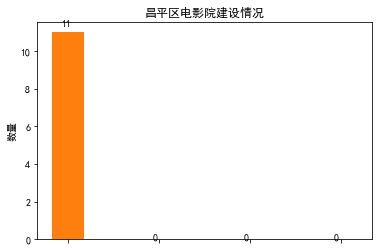

In [21]:
Station=loop(allList)
#print(Station)
station=draw(Station,"电影院")
